# EDA

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#df_train = pd.read_csv("../data/01-raw/train.csv", 
#                 parse_dates=['Date'], 
#                 index_col='Date')
#

#df_test = pd.read_csv("../data/01-raw/test.csv", 
#                 parse_dates=['Date'], 
#                 index_col='Date')

#df = pd.concat([df_train, df_test], axis=0)

df = pd.read_csv("../data/01-raw/train.csv", 
                 parse_dates=['Date'], 
                 index_col='Date')

df.sort_index(inplace=True)

In [3]:
df.head(3)

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-01,6,1,957
2010-01-01,4,9,947


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230090 entries, 2010-01-01 to 2018-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   store        230090 non-null  int64
 1   product      230090 non-null  int64
 2   number_sold  230090 non-null  int64
dtypes: int64(3)
memory usage: 7.0 MB


In [5]:
df.describe()

,store,product,number_sold
count,230090.000000,230090.000000,230090.000000
mean,3.000000,4.500000,780.926107
std,2.000004,2.872288,204.096737
min,0.000000,0.000000,238.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,835.000000
75%,5.000000,7.000000,914.000000
max,6.000000,9.000000,1205.000000


dont have missing values

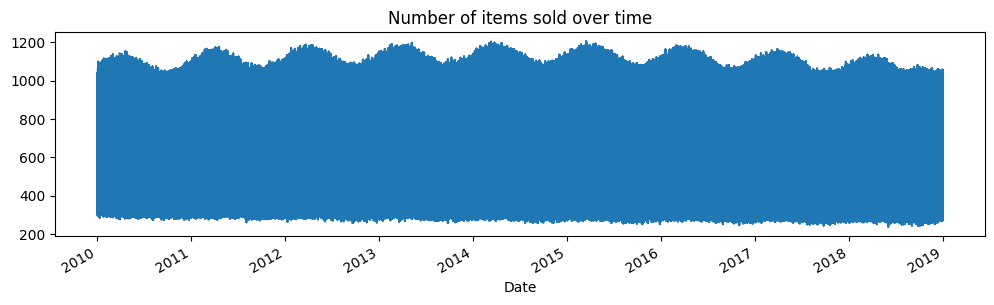

In [6]:
# Plot inicial
df['number_sold'].plot(figsize=(12, 3), title="Number of items sold over time")
plt.savefig("../reports/figures/initial_serie.png")

its not understand nothing omg

In [7]:
daily_sales = df.groupby('Date')['number_sold'].sum().reset_index()

serie temporal agregada

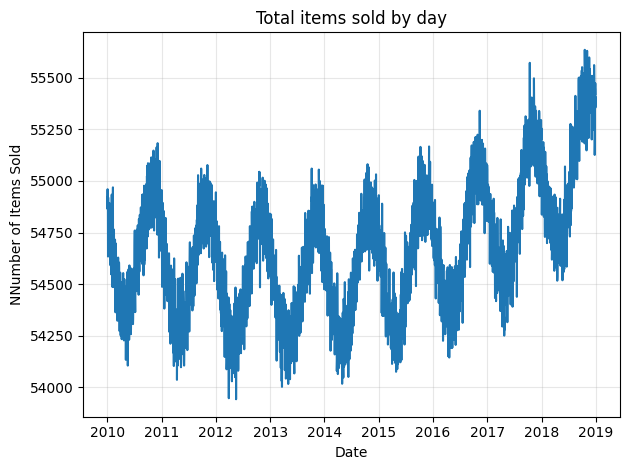

In [8]:
sns.lineplot(data=daily_sales, x='Date', y='number_sold')

#plt.figure(figsize=(12, 6))
plt.title('Total items sold by day')
plt.xlabel('Date')
plt.ylabel('NNumber of Items Sold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../reports/figures/initial_serie.png")

ok we can see a tendecy, like in first half of each year it we have a decrement and in lest half a acrement. more, in last 4 years, the tendecy is acree

now we will se itens sold by store

Text(0.5, 1.0, 'Total items sold by store')

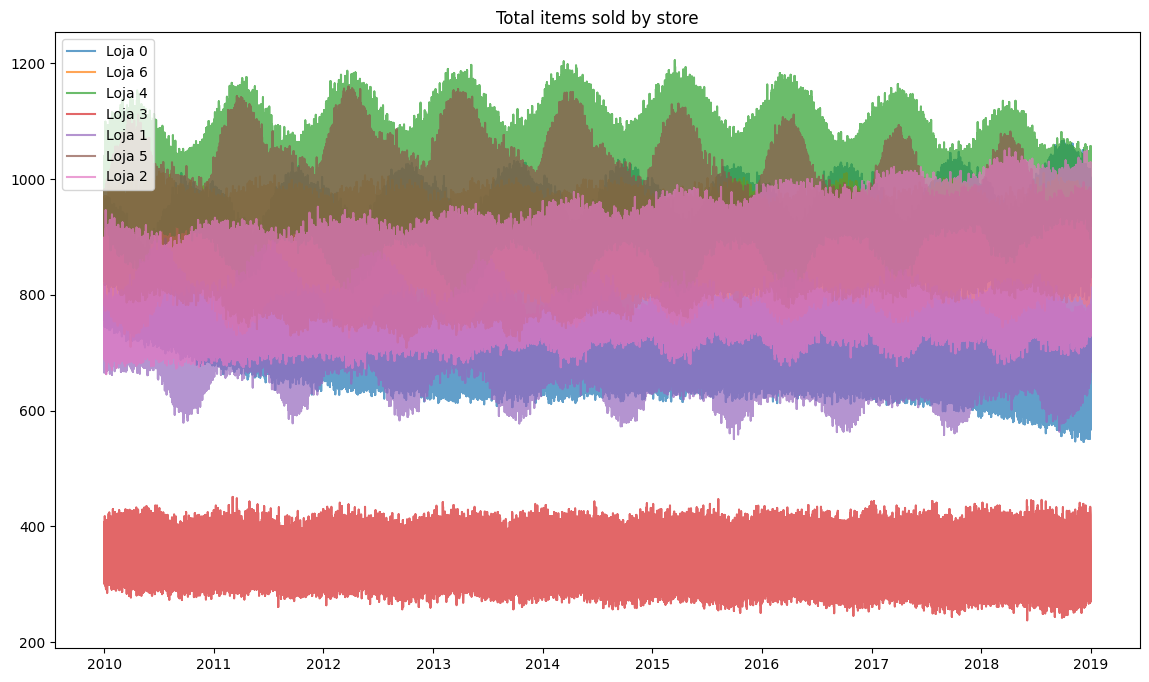

In [9]:
plt.figure(figsize=(14, 8))
for store in df['store'].unique():
    store_data = df[df['store'] == store]
    plt.plot(store_data.index, store_data['number_sold'], label=f'Loja {store}', alpha=0.7)
plt.legend()
plt.title('Total items sold by store')

decomposicao sazonal

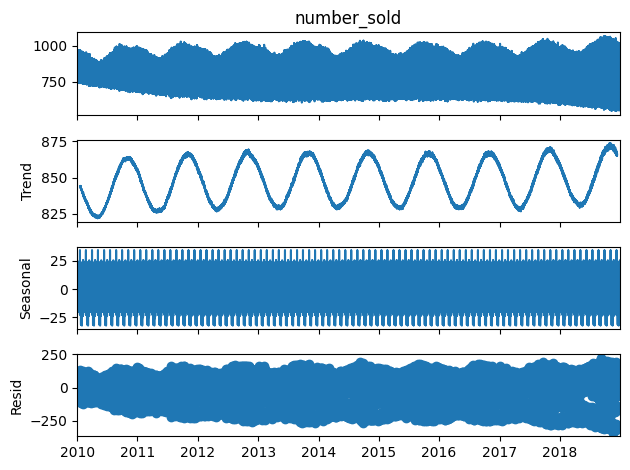

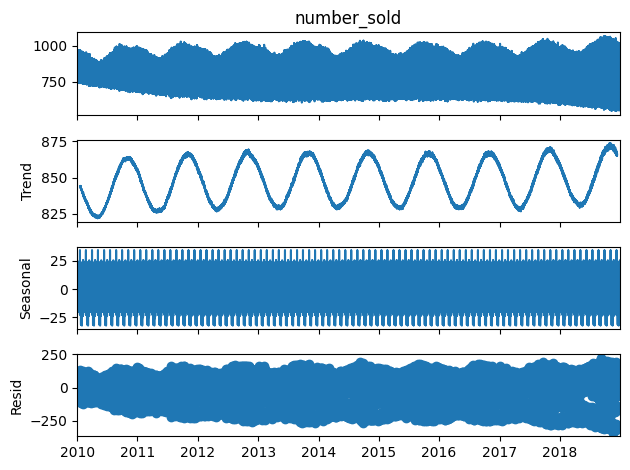

In [10]:
exemplo = df[df['store'] == 0]['number_sold']
result = seasonal_decompose(exemplo, model='additive', period=365)
result.plot()

há uma obvia tendencia anual:
- As vendas tendem a diminuir na primeira metade de cada ano.
- Na segunda metade, as vendas aumentam, atingindo o pico no final do ano.

autocorrelação

Text(0.5, 1.0, 'Autocorrelação das Vendas')

<Figure size 1200x600 with 0 Axes>

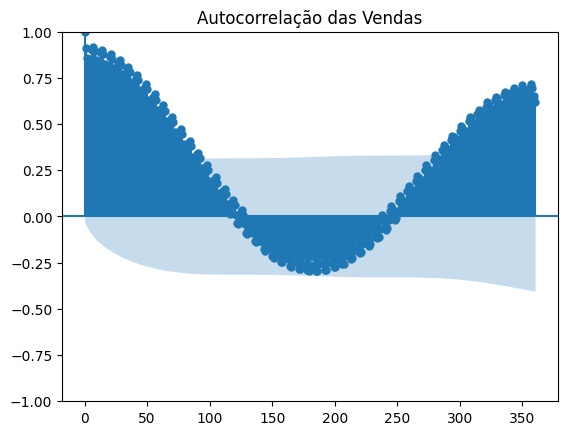

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(daily_sales['number_sold'], lags=360)  # 1 ano de lags
plt.title('Autocorrelação das Vendas')